# Problem Set 2, due September 18 at 11:59pm

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [1]:
# Importing modules
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# Extra shortcut for matplotlib plt and inline plots
import matplotlib.pyplot as plt  
%matplotlib inline

# Stats Models  library for regressions
import statsmodels as sm
print("Statsmodels version:    %6.6s (need at least 0.8.0)" % sm.__version__)

# Statsmodel api as a shortcut
import statsmodels.formula.api as smf

IPython version:       6.1.0 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:        0.19.1 (need at least 0.12.0)
Pandas version:       0.20.3 (need at least 0.11.0)
Maplotlib version:     2.0.2 (need at least 1.2.1)
Statsmodels version:     0.8.0 (need at least 0.8.0)


In [22]:
# Importing the Progresa program data
progresa = pd.read_csv('progresa_sample.csv')

# Display the head of the DF
progresa.head()

# Check its shape
r, c = progresa.shape
print("Progresa DataFrame has", r, "rows and", c, "colums", sep = " ")

# Number of NA
Nmissing = progresa.isnull().sum().sum()
print("There are", Nmissing, "missing values")

# Check Poor and Progresa values
print("Checking non-numeric values in poor and progresa columns")
print("Poor:", progresa["poor"].unique(), "\n", 
      "Progresa:", progresa["progresa"].unique(), sep = "")

# Create a new DF replacing non-numerical columns and check it (head)
progresa2 = progresa

# Poor/pobre = 1, non-poor/no pobre = 0
progresa2["poor"] = progresa2["poor"].replace(["pobre", "no pobre"], [1, 0])

# Basal is not treatment: basal = 0, treatment = 1 
progresa2["progresa"] = progresa2["progresa"].replace(["basal", "0"], [1, 0])

# Display head for getting familiar with the data set
progresa2.head()

Progresa DataFrame has 77250 rows and 21 colums
There are 19438 missing values
Checking non-numeric values in poor and progresa columns
Poor:['pobre' 'no pobre']
Progresa:['0' 'basal']


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [3]:
# Create a list with the non-demographic variables
nocols = ["year", "folnum", "village"]

# Create a DF without the non-demographic variables
progDF = progresa2.drop(nocols, axis = 1)

# Compute the mean and std of the demographic variables
progDFmean = progDF.mean()
progDFstd = progDF.std()

# Sort the colums alphabetically
sortedcolumns = sorted(progDFmean.index, key = str.lower)

# Create the DataFrame
progsum = pd.DataFrame({'Mean':progDF.mean(), 
                        'Standard deviation':progDF.std()}, 
                        index = sortedcolumns)

# Display the summary DF
display(progsum)  

,Mean,Standard deviation
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [4]:
# New DataFrame with poor and 97 observations
Filtprog = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 97)]

# Separating data by groups and drop irrelevant variables
PrTreatment = Filtprog[Filtprog["progresa"] == 1].drop(["year", "folnum", 
                                                        "village", "progresa", "poor"], axis = 1)
PrBasal = Filtprog[Filtprog["progresa"] == 0].drop(["year", "folnum", 
                                                    "village", "progresa", "poor"], axis = 1)

# Mean of each group
MeanTr = PrTreatment.mean()
MeanBasal = PrBasal.mean()

# p-values array
pvalues = []

# Calculate the p-value for each group
for index in MeanTr.index:    
    twosample_results = sp.stats.ttest_ind(PrTreatment[index].dropna(), PrBasal[index].dropna())
    TestStatistic, p_value = twosample_results
    pvalues.append(p_value)
    
# Create DataFrame
DiffBaselines = pd.DataFrame({"Average value (Treatment Villages)": MeanTr,
                              "Average value (Control villages)": MeanBasal, 
                              "Difference (Treat - Control)": MeanTr - MeanBasal,
                              "p-value": pvalues})

# Sort index
DiffBaselines.sort_index(inplace = True)
DiffBaselines.index.name = "Variable Name"

# Display the DF
display(DiffBaselines)

,Average value (Control villages),Average value (Treatment Villages),Difference (Treat - Control),p-value
Variable Name,,,,
age,10.742023,10.716991,-0.025032,4.785594e-01
dist_cap,153.769730,150.829074,-2.940656,8.415005e-04
dist_sec,2.507662,2.453122,-0.054540,3.569843e-02
fam_n,7.302469,7.281327,-0.021142,4.271039e-01
grc,3.543050,3.531599,-0.011450,6.890151e-01
grc97,3.543050,3.531599,-0.011450,6.890151e-01
hohage,44.276918,43.648828,-0.628090,1.796243e-06
hohedu,2.590348,2.663139,0.072791,1.105093e-02
hohsex,0.922947,0.924656,0.001709,5.711858e-01


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 

Based on the results obtained in the previous table, we will consider a significance level of 95% in order to check if the null hypothesis of the t-test for identical means for independent samples is rejected or not. In other words, we will reject the null hypothesis for those variables having p-value < 0.05 indicating us that there is a statistically significant difference between the treatment and control villages as baseline. 

Hence, based on the p-values calculated we can see statistically significant differences between the treatment and the control villages at baseline for the following variables (demographic characteristics):

   - $dist\_cap$
   - $dist\_sec$ 
   - $hohage$
   - $hohedu$
   - $hohwag$
   - $min\_dist$
   - $sex$
   - $welfare\_index$

* B: Why does it matter if there are differences at baseline?

The importance of finding differences at baseline level consists of the fact that the experiments performed for the Progresa project are based on the important assumption that all the villages that were selected for the program were completely randomly selected and thus, it is expected that on average, no baselines differences (for the dataset demographic characteristics) were present inside the experiment data.

In this case, since we found some significant baseline differences it may indicate that the performed experiment was not completely random and thus, the results obtained from it could have included some relevant biases leading to wrong analysis/conclusions.

* C: What does this imply about how to measure the impact of the treatment?

The main implication of finding significant baseline differences regarding how to measure the impact of the treatment consists of the fact that the impact of the treatment may not be based only on the treatment, but also because of other factors like some demographic characteristics of the villages.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

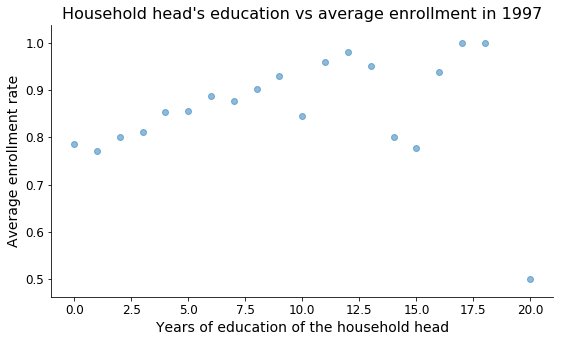

In [23]:
# Geting unique values
HouseEduVals = progresa2["hohedu"].unique()

# Data Frame from 97
Prog97 = progresa2[progresa2["year"] == 97]

# Average enrollment rates in 1997
HouseEduMeans = Prog97[Prog97["poor"] == 1].groupby(['hohedu']).mean()
HouseEduMeans.reset_index(level=0, inplace=True)

# Scatter plot Household head education (x) and average enrollment in 1997 (y)
# Figure size
plt.figure(figsize = (9, 5)) 

# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 

# Title and labels
plt.title(r'Household head''\'s education vs average enrollment in 1997')
plt.xlabel(r'Years of education of the household head')
plt.ylabel(r'Average enrollment rate')

# Plot
plt.scatter(HouseEduMeans["hohedu"], HouseEduMeans["sc"], alpha = 0.5)


### Interpretation
Based on the scatterplot we can clearly see that there exists a positive correlation between the number of years of education of the household head and the the average enrollment rate of the kids. As expected (by intuition), this indicates and confirms the idea that families, where parents have a higher educational level, are more likely to send their children to schools since they already know the importance of getting a good education. 

However, in the previous graph, we can see that there are some observations where this pattern is not followed. Household heads with 10 or 15 years of education are not exactly following the tendency (increasing average enrollment rate) of the rest of the observations, although they do not seem to be explicit outliers. 

On the other hand, we can see that the average enrollment rate for families where the number of years of education of the household head's is 20 reached the lowest value across all observations (0.5), situation that goes against our intuition and previous positive correlation description. Therefore, further exploration and analysis are needed in order to check this particular situation since it is not likely that parents with the highest educational level are the ones that do not want to (or tend to not) send their children to schools.

We can develop an analysis regarding the size of the samples for each household educational level in order to obtain more insights of the situation described  above:

In [6]:
# Hohedu sample sizes (97)
HoheduSamples97 = Prog97.groupby('hohedu').size()

# Hohedu sample sizes (all years)
HoheduSamplesAll = progresa2.groupby('hohedu').size()

# Create and display DataFrame
DFHoheduSamples = pd.DataFrame({"Observations Year 97": HoheduSamples97,
                              "Observations all years:": HoheduSamplesAll})
DFHoheduSamples.index = HoheduSamplesAll.index
DFHoheduSamples.index.name = "Size"
display(DFHoheduSamples)

,Observations Year 97,Observations all years:
Size,,
0,11041,22082
1,2640,5280
2,5839,11678
3,7581,15162
4,2825,5650
5,1247,2494
6,5368,10736
7,185,370
8,294,588


### Interpretation: Extra analysis
Based on the years of education of household head sample sizes data frame created, we can clearly see that the number of observations/entries registered for those families where the number of years of education is higher than 13 is very small in comparison to those families with a lower educational level. Therefore, we have situations like the particular one presented for the case of 20 years of education where all observations are outliers and then, since the size of the sample is extremely small and therefore not significant, we can ignore these outliers.

Hence, based on the previous analysis we can conclude that there exists a positive correlation between the average enrollment rate during 1997 and the number of years of education of the head household in a family.

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

Years 1997-1998
Pre-treatment average enrollment rate [%]: 81.383941106
Pos-treatment average enrollment rate [%]: 82.9536204263
Difference between pre and post treatments [%]: 1.56967932034


,T-Test Value,p-value
Independent Samples test,-2.015713,0.044249


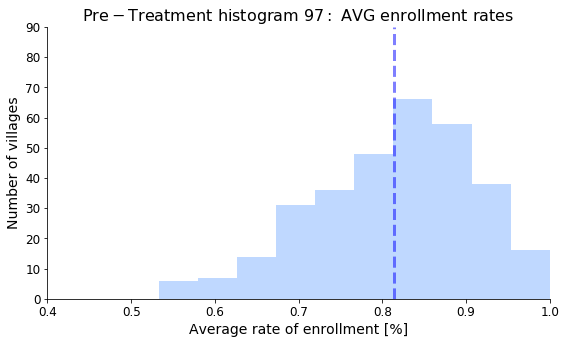

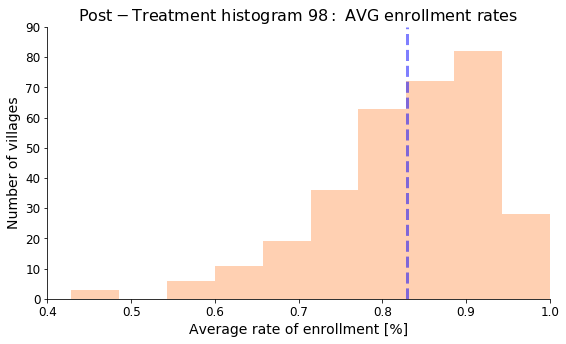

In [7]:
# Filtered DF
Filtprog97 = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 97)]
Filtprog98 = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 98)]

# Poor households in treated villages (1997)
TrVill97 = Filtprog97[Filtprog97["progresa"] == 1].groupby("village").mean()

# Poor households in treated villages (1998)
TrVill98 = Filtprog98[Filtprog98["progresa"] == 1].groupby("village").mean()

# Rate values
T97 = TrVill97['sc'].mean() * 100
T98 = TrVill98['sc'].mean() * 100
Diff = T98 - T97

# Test-t Values
twosample_results = sp.stats.ttest_ind(TrVill97["sc"], TrVill98["sc"])
TestStatistic, p_value = twosample_results
TResults = pd.DataFrame({"T-Test Value": TestStatistic,
                         "p-value": p_value}, 
                         index = ["Independent Samples test"])

# Print values
print("Years 1997-1998")
print("Pre-treatment average enrollment rate [%]:", T97)
print("Pos-treatment average enrollment rate [%]:", T98)
print("Difference between pre and post treatments [%]:", Diff)
display(TResults)

# Plot General settings
# Font sizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

# Figure 1
plt.figure(1)

# Figure size
plt.figure(figsize = (9, 5)) 

# Axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
plt.ylim([0, 90])
plt.xlim([0.4, 1])
plt.xticks(np.arange(0.4, 1.1, 0.1))

# Title and labels
plt.title(r'$\mathrm{Pre-Treatment\ histogram\ 97:\ AVG\ enrollment\ rates}$')
plt.xlabel(r'Average rate of enrollment [%]')
plt.ylabel(r'Number of villages')

# Plot
plt.hist(TrVill97["sc"].values, color = '#80b3ff', alpha = 0.5)
plt.axvline(TrVill97["sc"].mean(), color = 'b', linestyle = 'dashed', 
            linewidth = 3, alpha = 0.5)

# Figure 2
plt.figure(2)

# Figure size
plt.figure(figsize = (9, 5)) 

# Axes
ax = plt.subplot(111)                    
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left() 
plt.ylim([0, 90])
plt.xlim([0.4, 1])
plt.xticks(np.arange(0.4, 1.1, 0.1))

# Title and labels
plt.title(r'$\mathrm{Post-Treatment\ histogram\ 98:\ AVG\ enrollment\ rates}$')
plt.xlabel(r'Average rate of enrollment [%]')
plt.ylabel(r'Number of villages')

# Plot
plt.hist(TrVill98["sc"].values, color = '#ffa366', alpha = 0.5)
plt.axvline(TrVill98["sc"].mean(), color = 'b', linestyle = 'dashed', 
            linewidth = 3, alpha = 0.5)

### Does there appear to be a difference? 
Looking at the histograms we can see that the average rate of enrollment is pretty similar in both graphs, between 81 and 82% (Pre-treatment average enrollment rate [%]: 81.383941106, Post-treatment average enrollment rate [%]: 82.9536204263, an increase of 1.569 [%]), hence, we cannot conclude that there exists (or not) a significant difference between the pre and post-treatment results. On the other hand, we can see a right skew in the post-treatment distribution (98) that may indicate that the average rate of enrollments has increased due to the treatment effects. However, we have no concrete evidence to extract conclusions.

### Is this difference statistically significant?
Based on the results obtained for the T-tests for two independent samples, we can see that the p-value obtained is < 0.05, indicating that we can reject the equal means null hypothesis with a 95% of significance. Therefore, we can conclude that the pre and post-treatment difference between the mean average rate of enrollments for villages that are part of the Progresa program are statistically significant, although the p-value is very close to 0.05. 

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [8]:
# 1998 non-control and control groups
Tr98 = progresa2[(progresa2["poor"] == 1) &
                 (progresa2["year"] == 98) &
                 (progresa2["progresa"] == 1)]
Ct98 = progresa2[(progresa2["poor"] == 1) & 
                 (progresa2["year"] == 98) & 
                 (progresa2["progresa"] == 0)]

# Average enrollment and Diff
AvgTr98 = Tr98["sc"].mean()
AvgCt98 = Ct98["sc"].mean()
Diff98 = AvgTr98 - AvgCt98

# Test-t Values
twosample_results = sp.stats.ttest_ind(Tr98["sc"].dropna(), Ct98["sc"].dropna())
TestStatistic, p_value = twosample_results
TResults = pd.DataFrame({"Mean Treatment": AvgTr98,
                         "Mean Control": AvgCt98,
                         "T-Test Value": TestStatistic,
                         "p-value": p_value}, 
                         index = ["Independent Samples test"])

# Display results
display(TResults)

,Mean Control,Mean Treatment,T-Test Value,p-value
Independent Samples test,0.807637,0.846479,8.358721,6.636344e-17


### Results
Based on the previous results we can see that the average enrollment rate for the control villages is 0.807 while for the treated villages this value is 0.846, reaching a difference of 0.038. Following the single differences impact analysis performed, we can observe that the p-value obtained from the independent T-Test for two samples is < 0.05, allowing us to reject the identical means null hypothesis at a significant level of 95%. Therefore, we can conclude/interpret that there exists a significant difference between the average enrollment rate for both control and treated villages inside the Progresa program, leading to higher average enrollment rates in those villages where the program is applied (treated villages, more kids enrolled in schools).

Notice that since the p-value is a very small number (6.633e-17), we can also reject the null hypothesis for a 99% significance level. This can be interpreted as follows: the probability of actually getting the computed difference at random is as small as 6.633-17.

Therefore, if we only analyze the impact of the Progresa program by the simple difference analysis, we would conclude that the treated villages have a higher average rate of enrollment than those villages who were not part of the Progresa program.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [9]:
# Filtering the DataFrame (poor, 98)
Tr98 = progresa2[(progresa2["poor"] == 1) & 
                 (progresa2["year"] == 98)]

# Regression model: Post treatment
RegModel = smf.ols(formula = 'sc ~ progresa', data = Tr98).fit()

# Display Summary
display(RegModel.summary())

# Standard error
RegModel.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           6.64e-17
Time:                        20:53:51   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Intercept    0.003660
progresa     0.004647
dtype: float64

### Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.

Based on the results obtained and due to the fact that the coefficient for Progresa is 0.0388, it is possible to conclude that Progresa increases the likelihood of a child getting enrolled in a school by 0.038 times. Hence, this means that for a unit increase in Progresa variable, the average enrollment would increase by 3.88%. 

As an extra analysis, we can say that:
- If there is no treatment, then the average enrollment rates would have been 0.8076 (80.76%)
- If the family has been treated, then we have an expected increase of 0.0388 (3.88%) for the average enrollment rates.

### How does your regression estimate compare to your t-test estimate from part 2.1?

Looking at the parameter values, we can observe that the first estimated coefficient ($\hat{\beta_1}$) is exactly the same value as we obtained in the T-test estimated in part 2.1. This is logic since in the regression we are computing the ($\hat{\beta_1}$) coefficient as the difference between the observed value and the mean values. Therefore, the two expressions are identical and thus we have this result.

In addition, we can perform a second check just by computing 0.8076 (Mean control) + 1 x 0.3884 (Means' difference) = 0.8464 (Mean Treatment).

### Based on this regression model, can we reject the null hypothesis that the treatment effects are zero?

In this case, we can clearly see that p-value is < 0.05, thus, we can say that the probability of observing similar (the same) enrollment rates if the Progresa treatment effect is equal to zero is < 0.05. Hence, at a 95% level of significance, we can indicate that the values obtained for the enrollment rates depend on the Progresa treatment effect and not by a random success. 

Therefore, based on the results obtained we can reject the null hypothesis of zero treatment effects (Progresa program) in our model.

### What is the counterfactual assumption underlying this regression?

Since we are performing a regression, the counterfactual assumption underlying this model consists of: if there is no treatment performed by Progresa (under the absence of any treatment) and not any pre-existing trend in the experiment, then we are assuming that the rate of enrollment inside the treated villages would have been exactly the same as the one obtained by the control villages.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [10]:
# Filtering the DataFrame (poor, 98)
Tr98 = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 98)]

# Multiple Regression 
MultiRegModel = smf.ols(formula = 
'sc ~ progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + welfare_index', 
                        data = Tr98).fit()

# Summary display
display(MultiRegModel.summary())

# Standard error
MultiRegModel.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     849.5
Date:                Sun, 17 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:53:51   Log-Likelihood:                -7541.1
No. Observations:               27263   AIC:                         1.511e+04
Df Residuals:                   27250   BIC:                         1.521e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4431      0.018     80.855      0.000       1.408       1.478
progresa          0.0337      0.004      8.418      0.000       0.026       0.042
age              -0.0657      0.001    -94.750      0.000      -0.067      -0.064
dist_cap          0.0002    3.7e-05      5.512      0.000       0.000       0.000
dist_sec         -0.0106      0.001    -12.012      0.000      -0.012      -0.009
fam_n             0.0006      0.001      0.727      0.467      -0.001       0.002
hohage        -2.299e-05      0.000     -0.118      0.906      -0.000       0.000
hohedu            0.0079      0.001      9.224      0.000       0.006       0.010
hohwag         -7.23e-07   2.81e-06     -0.257      0.797   -6.24e-06    4.79e-06
indig             0.0188      0.005      3.961      0.000       0.009       0.028
min_dist          0.0004   6.34e-05      6.326      0.000       0.000       0.001
sex               0.0304      0.004      7.847      0.000       0.023       0.038
welfare_index  2.283e-05   1.82e-05      1.253      0.210   -1.29e-05    5.85e-05
==============================================================================
Omnibus:                     2940.375   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3992.254
Skew:                          -0.930   Prob(JB):                         0.00
Kurtosis:                       3.237   Cond. No.                     9.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.017848
progresa         0.004005
age              0.000693
dist_cap         0.000037
dist_sec         0.000885
fam_n            0.000880
hohage           0.000195
hohedu           0.000857
hohwag           0.000003
indig            0.004734
min_dist         0.000063
sex              0.003869
welfare_index    0.000018
dtype: float64

### General Analysis
As a general view of the new model we can see that after including the new set of control variables ($age,$ $dist\_cap,$ $dist\_sec,$ $fam\_n,$ $hohage,$ $hohedu,$ $hohwag,$ $indig,$ $min\_dist,$ $sex,$ and $welfare\_index$) to the regression, the model has been improved in different aspects. One of them consists of the total variance explained by the model:
 - The R-squared value obtained by this new model is 0.272, far better than the R-squared = 0.003 value reached in the previous simple regression model. Since we know that the definition of R-squared consists of the percentage of the response variable variation that is actually explained by a linear model, this means that this new regression model explains about 27% of the variability of the response data around its mean, in comparison to the 0.3% of the previous model.

$R^{2} = \dfrac{\text{Explained variation}}{\text{Total variation}}$

### How do the controls affect the point estimate of treatment effect?

Due to the introduction of the control variables in the regression model, we can see that the point estimate of treatment effect has changed. Looking at the results, we can clearly see that it has decreased from the previous 0.0388 to a value of 0.0337. Although it is not a very significant change, we can still appreciate some differences between both models.

Since the introduction of the control variables has decreased the point estimate of the treatment effect, we can interpret this new results as follows: the treatment variable $progresa$ was over-estimating the treatment effect in the original model, by including the impact/effect of other control variables. After adding these control variables, part of the treatment effect can be explained by their presence, leading to a reduction in the coefficient of the current treatment variable $progresa$.

On the other hand, we can see a significant change in the intercept coefficient from an original value of 0.8076 to a new value of 1.4431. In addition, other coefficients (such as $age$ or $sex$) are statistically significant (null hypothesis is rejected with a p-value = 0) although  their magnitude is not significantly large.


### How do the controls affect the standard error on the treatment effect?

Based on the standard error results displayed, we can see that introducing the set of control variables to the model has improved the value of the standard error on the treatment effect, from a value of 0.004647 to 0.004005. This means that the accuracy of the prediction performed by the model has been improved because we know that the standard error of the estimation represents a measurement of the prediction's accuracy. In other words, our treatment variable has become more accurate.

Hence, we know have a better model in terms of the prediction of our treatment effect, allowing us to obtain better insights, interpretations, and possibly conclusions of the whole impact of the experiment.


### How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
Comparing the differences and similarities between both models we can interpret the following:
- As we already mentioned at the beginning of this section, one of the major differences between both models consists of the value of the R-squared statistic. The R-squared value obtained by this new model is 0.272, far better than the R-squared = 0.003 value reached in the previous simple regression model. Since we know that the definition of R-squared consists of the percentage of the response variable variation that is actually explained by a linear model, this means that this new regression model explains about 27% of the variability of the response data around its mean, in comparison to the 0.3% of the previous model.

- Looking at the values of significant coefficients from the control set variables we can interpret some of them as follows:
> - $age$: we have a negative coefficient (-0.0657), thus indicating that when increasing the age of a child by one year, there will be a decrease in the average enrollment rate by 0.0657 units (assuming no other factors change).
  - $dist\_sec$: another negative coefficient (-0.0106). Since this variable represents the nearest distance to a secondary school, we can interpret this value as the decrease in units of the average enrollment rate for every extra mile farther the school is from the village, decreasing it in 0.0106 units.  
  
From these two negative coefficients, we can hypothesize that older students are less likely to enroll into school and that families living far from schools are also less likely to send their children to school.  If we assume that the experiment was performed completely at random (randomized trial), the researcher can be tempted to develop causal relationship analysis.

> - $dist\_cap$: a positive but very small in magnitude coefficient (0.0002) for this variable can be interpreted as an increment in the average enrollment rate by 0.0002 units when the families are located one mile away from the capital. However, its magnitude is pretty small, not having a substantial impact in the regression model.  
> - $hohedu$: the positive coefficient associated with this variable (0.0079) follows our previous analysis performed in the scatter plot section. It indicates that the average enrollment rate will increase when the number of years of education of the household head is higher, confirming our previous thoughts regarding the positive correlation between these two variables. 
> - $indig$: a coefficient of 0.0188 indicates that when the family consists of native people (indigenous), there is an increment on the average enrollment rate by 0.0188 units ($indig$ is a binary variable). 
> - $min\_dist$: similar to the $dist\_cap$ variable, when obtaining a result when increasing the minimum distance to an urban center leads to an increase in the average enrollment rate. However, we again have a very small impact in terms of magnitude (0.0004).
> - $sex$: from the model results we can see that when the kid is a man, the average enrollment rate is increased by 0.0304 units. Thus, assuming a totally randomized experiment, the sex of the kid impacts the average enrollment rate achieved. 

- In the particular case of the treatment variable $progresa$, it is still the most likely and relevant variable for promoting/explaining the school enrollment, suffering a slight decrease in magnitude from 0.0388 (simple regression) to 0.0337 (multiple regression).    

- Based on the analysis from the previous question, since we have a lower standard error value for the multiple regression results, we know that the accuracy of the model has improved, thus obtaining a better model for representing and analyzing the current data set.

- The set of control variables affects the model significantly.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [11]:
# Filtered DF
Filtprog97 = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 97)]
Filtprog98 = progresa2[(progresa2["poor"] == 1) & (progresa2["year"] == 98)]

# Poor households in treated villages (1997)
TrVill97 = Filtprog97[Filtprog97["progresa"] == 1]

# Poor households in treated villages (1998)
TrVill98 = Filtprog98[Filtprog98["progresa"] == 1]

# Poor households in non-treated villages (1997)
CTVill97 = Filtprog97[Filtprog97["progresa"] == 0]

# Poor households in non-treated villages (1998)
CTVill98 = Filtprog98[Filtprog98["progresa"] == 0]

# Differences
DifControl = CTVill98.mean()["sc"] - CTVill97.mean()["sc"]
DifTreat = TrVill98.mean()["sc"] - TrVill97.mean()["sc"]
DiffinDiff = DifTreat - DifControl

# Create a DataFrame and display it
DFDinD = pd.DataFrame({"Post-Treatment": [CTVill98.mean()["sc"], TrVill98.mean()["sc"], 
                                         TrVill98.mean()["sc"] - CTVill98.mean()["sc"], ""],
                       "Pre-Treatment": [CTVill97.mean()["sc"], TrVill97.mean()["sc"], 
                                         TrVill97.mean()["sc"] - CTVill97.mean()["sc"], ""],
                       "Diff in Diff": ["", "", "", DiffinDiff]},
                       index = ["Control", "Treatment", "Difference", "Diff in Diff"])
DFDinD = DFDinD[["Pre-Treatment", "Post-Treatment", "Diff in Diff"]]
display(DFDinD)

,Pre-Treatment,Post-Treatment,Diff in Diff
Control,0.815186,0.807637,
Treatment,0.822697,0.846479,
Difference,0.00751088,0.0388422,
Diff in Diff,,,0.0313313


### What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
Based on the results obtained we can see that the estimated value of the impact applying a difference-in-differences framework is equal to 0.0313, which we can compare to the one obtained by the simple difference approach when using the basic one variable linear regression model (0.0388) and to the one obtained by the multiple variable linear regression model (0.0337). Thus, we can see that the estimation of the impact has been decreased when applying the difference-in-differences approach due to the fact that this method allows us to reduce the over-estimation of our previous model

We see that the estimate of the impact is 0.0313. We see that the impact has been reduced from 0.0388 (single variable linear regression) to 0.0366 (multiple variable linear regression) to now 0.0313 via the difference in difference estimate. This is because the difference-in-difference method actually reduces the over estimation of our previous models because of the possible time trends involved. In this sense, the estimate obtained by this method is more accurate following our intuition and the material studied in the course.

### What is the counterfactual assumption underlying this estimate?

The counterfactual assumption underlying this estimate consists of the fact that, in the absence of the treatment (Progresa treatment) during a determined period of time, the rate of enrollment in the treatment group (treated villages) would have been exactly the same as the rate of enrollment for the control group (control villages), assuming that the time trend is constant.

In other words, the assumption is: in the absence of treatment, there would not have been any difference between the average enrollment rates for both the treatment and control groups (villages), before and after the treatment.

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [12]:
# Binarization of years: 97 = 0, 98 = 1
progresa3 = pd.DataFrame.copy(progresa2)
progresa3["year"] = progresa3["year"].replace([97, 98], [0, 1])

# Filter the Dataset by poor 
PoorProg = progresa3[progresa3["poor"] == 1]

# Regression model: Diff in Diff by creating an interaction 
# between the treatment and the binarized year (period)
DinDModel = smf.ols(formula = 
'sc ~ progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + year + welfare_index + progresa*year', 
                    data = PoorProg)
DinDModelfit = DinDModel.fit()

# Display Summary
display(DinDModelfit.summary())

# Standard error
DinDModelfit.bse

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1634.
Date:                Sun, 17 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:53:51   Log-Likelihood:                -16476.
No. Observations:               58005   AIC:                         3.298e+04
Df Residuals:                   57990   BIC:                         3.312e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4111      0.012    114.216      0.000       1.387       1.435
progresa          0.0033      0.004      0.859      0.390      -0.004       0.011
age              -0.0658      0.000   -143.065      0.000      -0.067      -0.065
dist_cap          0.0002   2.55e-05      7.235      0.000       0.000       0.000
dist_sec         -0.0096      0.001    -15.459      0.000      -0.011      -0.008
fam_n             0.0001      0.001      0.208      0.835      -0.001       0.001
hohage            0.0002      0.000      1.711      0.087   -3.36e-05       0.000
hohedu            0.0072      0.001     12.158      0.000       0.006       0.008
hohwag         1.055e-06   1.93e-06      0.547      0.585   -2.73e-06    4.84e-06
indig             0.0242      0.003      7.407      0.000       0.018       0.031
min_dist          0.0004   4.39e-05      8.607      0.000       0.000       0.000
sex               0.0332      0.003     12.420      0.000       0.028       0.038
year              0.0280      0.004      6.429      0.000       0.019       0.037
welfare_index  2.013e-05   1.26e-05      1.599      0.110   -4.54e-06    4.48e-05
progresa:year     0.0308      0.006      5.583      0.000       0.020       0.042
==============================================================================
Omnibus:                     5460.754   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7170.195
Skew:                          -0.859   Prob(JB):                         0.00
Kurtosis:                       3.110   Cond. No.                     9.65e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.012355
progresa         0.003788
age              0.000460
dist_cap         0.000026
dist_sec         0.000624
fam_n            0.000603
hohage           0.000135
hohedu           0.000593
hohwag           0.000002
indig            0.003272
min_dist         0.000044
sex              0.002672
year             0.004352
welfare_index    0.000013
progresa:year    0.005513
dtype: float64

In [13]:
# Covariance values with respect to progresa
CovProg = PoorProg.cov()["progresa"]

# Create DataFrame and display it
CovProgDF = pd.DataFrame({"Covariance w/r progresa": CovProg})
display(CovProgDF)

,Covariance w/r progresa
year,0.000000
sex,0.003366
indig,-0.001468
dist_sec,-0.012869
sc,0.005244
grc,-0.000091
fam_n,-0.004989
min_dist,0.923816
dist_cap,-0.693891
poor,0.000000


### What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

In order to implement the difference-in-differences approach using a regression model, we introduce the effect of the interaction between the $progresa$ and $year$ (binarized: 0 pre, 1 post-treatment) variables. We also include the variable $year$ alone, as an extra control variable. Thanks to these modifications, the model will allow us to develop some analysis and interpret the meaning of the estimated coefficients.

 - $progresa$: In this case, the ${\hat{\beta}}_{progresa}$ coefficient decreases up to 0.0033 [%] from the previous 0.0388 (simple one variable regression) and the 0.0337 (multiple variable regression). However, we can see that the associated p-value is > 0.05 and thus, the coefficient is no longer statistically significant for the regression model, not allowing us to reject the null hypothesis of a null coefficient and hence, the impact of this variable is no longer significant inside the regression model. In addition, its standard error increases significantly from 0.004647 (one variable regression) and  (multiple variables regression) 0.004005 to 0.39, indicating that the variable lost predictive accuracy.
 - $year$: We include the variable $year$ as another control variable in order to be able to develop a deeper analysis of the Progresa treatment impact via the difference-in-differences regression approach. From the tables above, we can see that the estimated coefficient (0.0280) for this variable is statistically significant (p-value < 0.05), indicating that for the year 1998, the average enrollment rate is increased in 0.028 [%] in comparison to 1997.
 - $progresa*year$: This is the relevant interaction between $progresa$ and $year$ variables that we want to study in order to estimate the impact of the Progresa program. Looking at the model results, we can see that the value of the coefficient ${\hat{\beta}}_{progresa \times year}$ is equal to 0.0308, measured in rate of enrollment over time [years]. The interpretation of this coefficient consists of the fact that for families that are part of the Progresa subsidy program during the year 1998, the average enrollment rate would be 0.0308 higher [%] than in the other groups. We also note that the associated p-value of the coefficient in < 0.05 (in fact < 0.01), allowing us to reject the null hypothesis of a zero coefficient and therefore, we can say with a 95% of significance that the coefficient is not null.  

Thus, based on the previous analysis, we can see that $progresa$ variable is no longer useful for the regression model (the coefficient is not statistically significant) and that we can identify some positive effects (increasing the average rate of enrollment) related to the $year$ variable and the interaction of $progresa*year$. Therefore, as we already mentioned our estimate of the impact of Progresa following the current methodology is represented by ${\hat{\beta}}_{progresa \times year}$ = 0.0308 [rate of enrollment/time] (standard error: 0.005513).

### How do these estimates of the treatment effect compare to the estimates based on the simple difference?

When comparing these estimates of the treatment effect obtained by using the difference-in-differences framework to the ones estimated using the simple difference approach, we can observe that the impact of the treatment effect ($progresa$ variable, and $progresa*year$ interaction) has changed:
- The impact estimation is lower in the current implementation than it used to be, as we mentioned above. This can be measure by the coefficient of the $progresa$ variable: decreasing from 0.0388 to 0.0337, and finally to the current 0.0033. An explanation of this phenomena could be the fact that we were over-estimating the impact of this variable in the previous models because we were not including all the relevant control variables and interactions, obtaining larger values than the real impact magnitude of the treatment.
- In the simple difference model, $progresa$ variable was statistically significant (p-value < 0.05) but now using the difference-in-differences method, it is no longer statistically significant (p-value > 0.05)
- Regarding the relevant coefficient ${\hat{\beta}}_{progresa \times year}$ associated with the interaction $progresa*year$ (the difference-in-differences impact), we can see that the impact estimation is lower in comparison to the previous models: from 0.0388 and 0.0337, the current impact effect decreases up to 0.0308. The explanation of this pattern follows the same logic as we mentioned in the first point. As we said above, the p-value for this coefficient allows us to reject the null hypothesis of a null coefficient.

On the other hand, we can see that the p-values associated with the rest of the control variables tend to be approximately similar to the ones obtained before. 

Important is to remember that under the assumption of a totally randomized experiment, the covariance between any of the control variables and the treatment should be 0.

### How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?

Looking at both estimations, we can see that the overall estimations are pretty similar: a 0.0313 value (tabular estimation) and a 0.0308 value (regression estimation) indicating that the impact of the interaction variable has decreased due to the addition of extra control variables, decreasing the over-estimation performed by the tabular difference-in-differences model. This slight difference is clearly explained by the fact that we introduced extra terms to our model, including the time ($years$) consideration and the interaction between $years$ and the $progresa$ treatment. Thus, we can explain such differences if the completely randomized trial assumption fails, allowing systematic differences even before the groups are subject to any treatment.

Based on the model structure, the impact of the treatment in the year 1998 for the treated group should be measured as the sum of three coefficients: ${\hat{\beta}}_{progresa}$, ${\hat{\beta}}_{year}$, and ${\hat{\beta}}_{progresa \times year}$, while in the case of the tabular implementation, we are just considering the differences in the means of both groups (control and treatment) before and after the treatment.

In addition, some differences are experienced by the coefficients of the rest of the control variables.

### What is the counterfactual assumption underlying this regression?

The counterfactual assumption underlying this estimate consists of the fact that, in the absence of the Progresa treatment  during a determined period of time, the rate of enrollment in the treatment group (treated villages) would have been exactly the same as the rate of enrollment for the control group (control villages), assuming that the time trend is constant.

In other words, the assumption says that both groups' trends would have been the same in the absence of treatment.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [14]:
# Binarization of years: 97 = 0, 98 = 1
progresa3 = pd.DataFrame.copy(progresa2)
progresa3["year"] = progresa3["year"].replace([97, 98], [0, 1])

# Filter the Dataset by non-poor 
NPoorProg = progresa3[progresa3["poor"] == 0]

# Regression model: Diff in Diff by creating an interaction 
# between the treatment and the binarized year (period)
DinDModel = smf.ols(formula = 
'sc ~ progresa + age + dist_cap + dist_sec + fam_n + hohage + hohedu + \
      hohwag + indig + min_dist + sex + year + welfare_index + progresa*year',  
                    data = NPoorProg)
DinDModelfit = DinDModel.fit()

# Display Summary
display(DinDModelfit.summary())

# Output the p-values
DinDModelfit.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     303.7
Date:                Sun, 17 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:53:51   Log-Likelihood:                -3614.1
No. Observations:               10334   AIC:                             7258.
Df Residuals:                   10319   BIC:                             7367.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.4366      0.035     40.955      0.000       1.368       1.505
progresa          0.0243      0.009      2.612      0.009       0.006       0.043
age              -0.0685      0.001    -59.812      0.000      -0.071      -0.066
dist_cap          0.0006   7.63e-05      7.972      0.000       0.000       0.001
dist_sec         -0.0151      0.002     -8.532      0.000      -0.019      -0.012
fam_n            -0.0046      0.001     -3.160      0.002      -0.007      -0.002
hohage            0.0002      0.000      0.469      0.639      -0.001       0.001
hohedu            0.0081      0.001      6.609      0.000       0.006       0.010
hohwag         8.274e-07   3.13e-06      0.265      0.791    -5.3e-06    6.96e-06
indig             0.0146      0.010      1.399      0.162      -0.006       0.035
min_dist       -9.24e-05      0.000     -0.794      0.427      -0.000       0.000
sex               0.0286      0.007      4.227      0.000       0.015       0.042
year              0.0404      0.011      3.741      0.000       0.019       0.062
welfare_index  8.306e-05   2.85e-05      2.917      0.004    2.72e-05       0.000
progresa:year    -0.0032      0.014     -0.231      0.817      -0.030       0.024
==============================================================================
Omnibus:                      841.465   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.007
Skew:                          -0.623   Prob(JB):                    2.58e-175
Kurtosis:                       2.440   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Intercept        0.000000e+00
progresa         9.004981e-03
age              0.000000e+00
dist_cap         1.733066e-15
dist_sec         1.639636e-17
fam_n            1.583004e-03
hohage           6.388612e-01
hohedu           4.068608e-11
hohwag           7.913687e-01
indig            1.617601e-01
min_dist         4.273889e-01
sex              2.384043e-05
year             1.840488e-04
welfare_index    3.539553e-03
progresa:year    8.171625e-01
dtype: float64

### Do you observe any impacts of PROGRESA on the non-poor?
Based on the results from the previous tables, we can see that for both ${\hat{\beta}}_{progresa}$ and ${\hat{\beta}}_{year}$ we can reject the null hypothesis of zero coefficients (p-values < 0.05), and thus, we can say that there is a significant impact of both $progresa$ and $year$ variables on the non-poor as well, where the average enrollment rate increases by 0.0404 ($year$ coefficient) for the non-poor families that were not receiving the subsidy. In addition, the non-poor families that got the Progresa subsidy have also higher average enrollment rates defined by ${\hat{\beta}}_{year}$ + ${\hat{\beta}}_{progresa}$ = 0.0404 + 0.0243 = 0.0647.

However, we can see that the p-value for the interaction between the treatment and time $period*year$ is > 0.05, and thus, we cannot reject the null hypothesis that the coefficient ${\hat{\beta}}_{progresa}$ is in fact null. In other words, it is not statistically significant for our regression model. Therefore, the difference-in-differences impact is not statistically significant in this case.

In overall, we can observe that there exists some impact of Progresa on the non-poor, fact that we can understand after looking at the next code section where we identify some non-poor households that were part of the Progresa program, clearly influencing the results of this group. However, since the coefficient of the interaction term is not statistically significant, it means that the impact under the difference-in-differences framework is not significant.

### Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA might have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

Some reasons why Progresa might have impacted non-poor households are:
 - Checking the data set (see next cell with code), we are able to identify the number of non-poor families that were part of the Progresa program treatment group. This number ascends to 3558 non-poor households that are part of the villages included in the Progresa program. Therefore, we identified one source of explanation of why the Progresa program could have (indirect) impact non-poor households: 3558 non-poor households out of (3558 + 2371) = 5929 were part of the treatment group, in other words, about 60% of the total non-poor households were part of the Progresa treatment group (but not getting the subsidy). This is an important starting point for analyzing how the interaction between treated poor households and non-poor households that are in the same village could have impacted the non-poor families.    
 - Based on the goal of the project and the previous fact, non-poors households should not have received the treatment, no matter if they were part of the control or treatment groups. However, the previous situation (non-poor households getting the Progresa subsidy) could have happened due to extra factors such as corruption or political campaigns/favors, in order to get more supporters by attracting them via subsidies or national programs like Progresa.
 - There might exists some indirect effects regarding the impact on the average enrollment of non-poor households that were part (or not) of the Progresa treatment group such as: 
     1. Non-poor households start to see that more families are enrolling their children in school and then we have a positive feedback and snowball effect, motivating the non-poor households (and also other poor ones) to enroll their children at school. 
     - A group of non-poor households could have realized that their children will be in disadvantage in the future in comparison to the children of the poor households since they are getting enrolled in schools while their children not, thus, they might not want their children to be left behind by those other children, encouraging the non-poor households to enroll their kids in schools. 
     - They could have seen how the children of the poor households are improving their abilities and generating positive externalities in their environments (non-poor households can live close to other poor households) since they were enrolled in school. Therefore, they could have wanted to replicate these effects in their own environment in order to improve their own situation.
     - Some group of non-poor households could have expected to get some future benefits like new subsidies from the government or other organizations in order to move the Progresa project to a second stage. They could have thought that right after the end of the Progresa program, new programs will appear in order to continue with the main goal of the project maybe with some subsidies for those families with a certain amount of kids enrolled in schools and/or with children enrolled in schools for a certain amount of years.   

In [20]:
# Number of non-poor in control and treatment groups Progresa
npP,cnpP = progresa3[(progresa3["poor"] == 0) & 
                     (progresa3["progresa"] == 1) &
                     (progresa3["year"] == 0)].shape

npNP, cnpNP = progresa3[(progresa3["poor"] == 0) & 
                        (progresa3["progresa"] == 0) & 
                        (progresa3["year"] == 0)].shape 

print("Number of non-poor households treatment Progresa: ", npP, sep = "")
print("Number of non-poor households control Progresa: ", npNP, sep = "")

# Total amount of non-poor
NPTot, cNPTot = progresa3[(progresa3["poor"] == 0) & 
                          (progresa3["year"] == 0)].shape 
print("Total number of non-poor households: ", NPTot, sep ="")

Number of non-poor households treatment Progresa: 3558
Number of non-poor households control Progresa: 2371
Total number of non-poor households: 5929


### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

### Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico?

Based on all the previous analysis, we notice the following patterns:
- When solving the simplest single difference model, we observe that the Progresa program (treatment variable $progresa$) arises as a statistically significant component of the regression model with an impact of 0.0388 in the average enrollment rate.
- After solving the single difference model including a set of multiple control variables, we can see that the treatment variable $progresa$ remains significant for the model. However, its impact is slightly reduced in comparison the simplest model, decreasing from 0.0388 up to 0.0337. On the other hand, we notice that the amount of explained variance ($R-squared$ value) increased in a significant way when adding these extra control variables, from 0.003 to 0.272. Same improvement (direction but not magnitude) is experienced by the standard errors. 
- Since we know that the single difference method might incur in over-estimations of the treatment effect due to the fact that there may exist a time trend, we develop a tabular difference-in-differences approach for the treatment and control groups over time, from the year 1997 to 1998 (pre and post). From this analysis, we obtain an impact of 0.0313. As expected, it is lower than the one obtained in the simple difference model since we are addressing the possible over-estimation effect.
- As a fourth step, we perform a difference-in-differences regression analysis since it allows us to compute relevant statistics (like errors, significance, etc.) of the relevant parameters involved in the model. Thus, we obtain that the $progresa$ variable alone is no longer statistically significant but, the relevant interaction term $progresa*year$ (as well as the $year$ variable) arises as a significant term, measuring the impact in 0.0308, very similar to one obtained using the tabular approach. In other words, the interaction between pre and post (1997/1998) and the group (treatment/control) is statistically significant.
- Finally, based on the spillover effect analysis we notice that about 60% of the non-poor households were part of the Progresa program treatment group. Our model reveals that the $progresa$ and $year$ variables as statistically significants. However, the interaction term $progresa*year$ is no longer significant, leading us to notice the lack of impact of the Progresa program in the non-poor households.  

Therefore, based on these results, as a first conclusion, we can clearly notice that there exists a positive correlation between the Progresa program and the school enrollment rates for the poor households in Mexico. We can see that those poor households that were part of the Progresa treatment group increase their enrollment rates from 1997 to 1998. This pattern can be seen in both control and treatment groups.

However, we cannot be completely sure about the causal impact of the Progresa program since we base our analysis on some assumptions that may not be completely right/sure/followed:
- Parallel trends are assumed in order to develop the difference-in-differences analysis: our analysis loose validity if we have differential trends. 
- Perfect randomized experiment: significant baseline differences were found in our analysis and therefore (as we mentioned in section 1.2) the impact of the treatment may not be based only on the treatment, but also because of other factors like some demographic characteristics of the villages.
- All the absence of treatment assumptions mentioned along with our analysis.

On the other hand, we know that the study was implemented (tried) in order to take into account and address these possible flaws: The baseline differences were small and based on the Progresa's published paper, the study followed a well defined randomization and the treatment and control groups should not differ significantly.

In addition, we need to analyze and take into account the impact of the Progresa program in the following years 1999 and 2000 in order to be able to develop a full picture conclusion.

Thus, although we are tempted to say that the Progresa program had a causal impact on the enrollment rates of poor households in Mexico due to our positive results, we need further investigation and analysis in order to check and assure this hypothesis.


### Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid. (Hint: Consider using the non-poor in your analysis)

Based on the main aim of the Progresa program, we might analyze the data for further investigation taking into account that the program seeks to increase the enrollment rate of the poor households in Mexico. Hence, we can check and compare the increase in the enrollment rates for the poor households participating in Progresa with the non-poor households enrollment rates that are **also** participating in the Progresa program. In other words, we are interested in comparing the difference in enrollment rates between poor and non-poor households between the treatment and control groups.

Therefore, we are interested in the "redistribution" of enrollment rates caused by the Progresa program since we expect that poor households enrollment rates within the treatment group will "catch up" (or even surpass) the enrollment rates of non-poor households in the treatment group. Hence, we will be able to analyze and measure the possibly causal impact of Progresa when comparing the magnitude of this difference and potentially its sign: we start with a positive difference - since the enrollment rates of non-poor households are larger than for the poor ones, $Y_1 = S_{pre:non-poor} - S_{pre:poor} > 0$ and we may end up with a smaller difference (or negative) term $Y_2 = S_{post:non-poor} - S_{post:poor}$ where $ Y_1 > Y_2 > 0$, or a high impact where $Y_2 < 0$, meaning that the poor and non-poor households enrollment rates relationship has been reversed. 

Using this approach, we can perform a similar difference-in-differences analysis as before in order to measure the impact of the treatment. Clearly, we would need the assumption of a random assignment as well as the non-differential trends as before in order to be able to obtain relevant results.

The counterfactual assumption that we would need in order to make this approach valid is: in the absence of the Progresa program (treatment), the difference in the rates of enrollment between non-poor and poor households in the treatment group (treated villages) would have been exactly the same as the difference in the rates of enrollment between non-poor and poor households for the control group (control villages), assuming that the time trend is constant.

#### Extra discussion
Based on our background, different approaches can be applied to the Progresa data set in order to further investigate the causal impact. One of them which we are familiar with is the following:
- Propensity score matching: the known PSM approach is a non-parametric estimation method that works by re-weighting the comparison sample in order to provide a counterfactual (estimated): in the absence of the Progresa program, what would the outcome of a treated poor household have been if it were not have received the treatment. It has a matching procedure where we can use a balancing score estimated from a logit model.